In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
tab1 = pd.read_csv(
    r"C:\Users\Ritwik\Desktop\Programming\Data Science\project\credit_card.csv"
)
tab = tab1


In [3]:
tab.shape


(8950, 18)

## Null Values
#### Let's deal with null values and see if there are to be deleted or modified

In [4]:
tab.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### As there is just one null value of CREDIT_LIMIT, we are going to remove this row  

In [5]:
tab = tab.dropna(subset=["CREDIT_LIMIT"], how="all")


In [6]:
tab.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
tab.MINIMUM_PAYMENTS.describe()


count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

#### As there are possibility of outliers, we are going to remove them 

In [8]:
iqr = tab.MINIMUM_PAYMENTS.quantile(0.75) - tab.MINIMUM_PAYMENTS.quantile(0.25)
ul = tab.MINIMUM_PAYMENTS.quantile(0.75) + (1.5 * iqr)
ll = tab.MINIMUM_PAYMENTS.quantile(0.25) - (1.5 * iqr)


In [9]:
tab = tab[tab.MINIMUM_PAYMENTS >= ll]
tab = tab[tab.MINIMUM_PAYMENTS <= ul]


<AxesSubplot:ylabel='MINIMUM_PAYMENTS'>

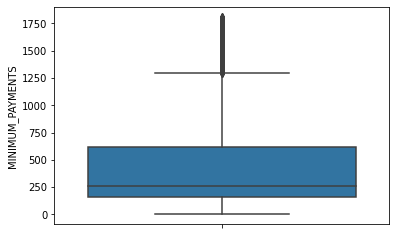

In [10]:
sb.boxplot(y="MINIMUM_PAYMENTS", data=tab)


In [11]:
tab.shape


(7795, 18)

In [12]:
tab.MINIMUM_PAYMENTS.describe()


count    7795.000000
mean      442.006365
std       406.956368
min         0.019163
25%       163.461570
50%       260.332459
75%       615.957402
max      1809.974326
Name: MINIMUM_PAYMENTS, dtype: float64

#### Now we will fill the null values with the mean

In [13]:
tab["MINIMUM_PAYMENTS"].fillna(tab.MINIMUM_PAYMENTS.mean(), inplace=True)


In [14]:
tab.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
tab.describe(include="all")


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7795,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000
unique,7795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1204.433821,0.885144,944.353022,563.781973,380.907121,830.617032,0.493812,0.206888,0.362961,0.126020,2.876844,14.082874,4245.712397,1600.457364,442.006365,0.173965,11.504298
std,NaN,1411.401331,0.215353,1877.790159,1419.065866,821.200278,1782.488262,0.399389,0.301066,0.394252,0.192121,6.218374,22.766976,3399.561606,2536.350423,406.956368,0.306538,1.351522
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,NaN,116.604131,0.875000,45.650000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,395.583948,163.461570,0.000000,12.000000
50%,NaN,753.518771,1.000000,363.380000,45.650000,90.030000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,809.176783,260.332459,0.000000,12.000000
75%,NaN,1723.685779,1.000000,1083.080000,588.575000,455.890000,955.282432,0.916667,0.333333,0.750000,0.166667,3.000000,17.000000,6000.000000,1738.051311,615.957402,0.181818,12.000000


#### CUST_ID is not useful, so we will drop the column

In [16]:
tab.drop("CUST_ID", axis=1, inplace=True)


In [17]:
tab.shape


(7795, 17)

## Visualizing Data

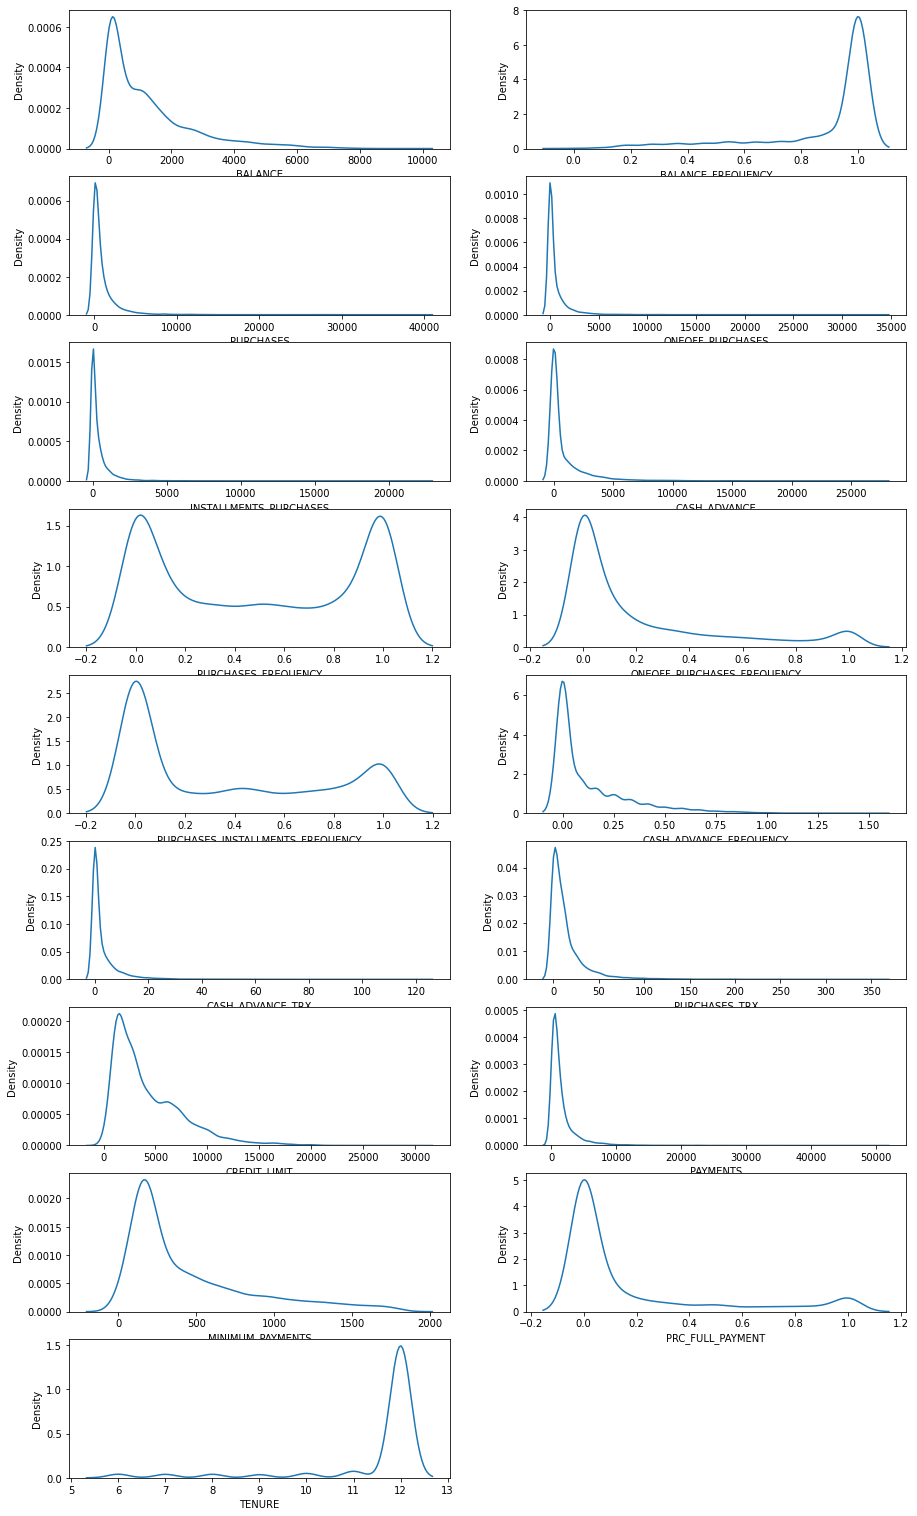

In [18]:
plt.figure(figsize=(15, 27))
for i, col in enumerate(tab.columns):
    if tab[col].dtype != "object":
        ax = plt.subplot(9, 2, i + 1)
        sb.kdeplot(tab[col], ax=ax)
        plt.xlabel(col)

plt.show()


#### There is a lot of skewness in the data. Let us modify the data to fit better

In [19]:
cols = [
    "BALANCE",
    "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE",
    "ONEOFF_PURCHASES_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY",
    "CASH_ADVANCE_TRX",
    "PURCHASES_TRX",
    "CREDIT_LIMIT",
    "PAYMENTS",
    "MINIMUM_PAYMENTS",
    "PRC_FULL_PAYMENT",
]
for col in cols:
    tab[col] = np.log(1 + tab[col])


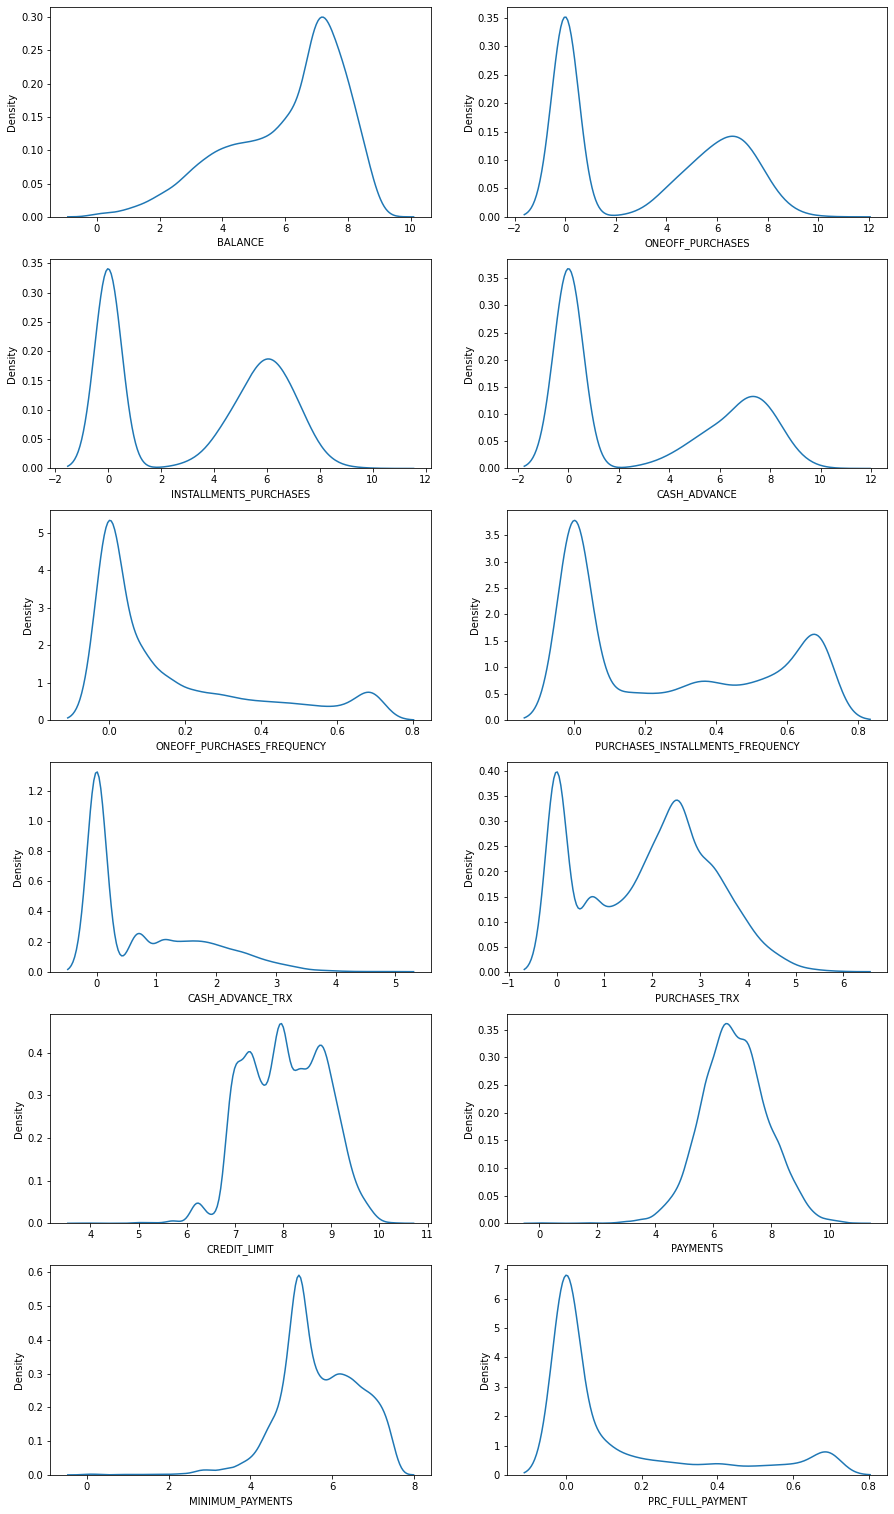

In [20]:
plt.figure(figsize=(15, 27))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i + 1)
    sb.kdeplot(tab[col], ax=ax)
plt.show()


#### Now the data is in good condition

<AxesSubplot:>

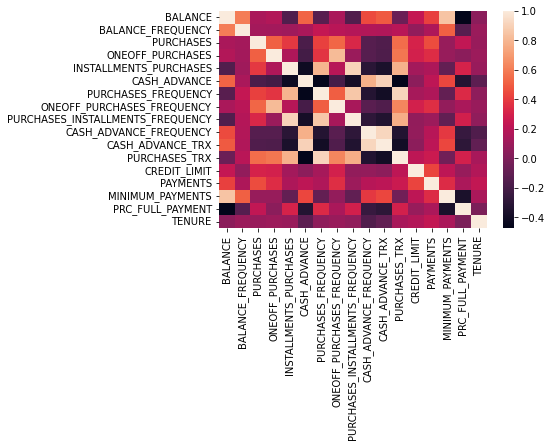

In [21]:
sb.heatmap(tab.corr())


#### Now we will standardize the data

In [22]:
pca = PCA(n_components=0.95)
tabpca = pca.fit_transform(tab)
tabpca


array([[-848.95450448],
       [-944.35910945],
       [-171.18019152],
       ...,
       [-799.95466242],
       [-944.36011919],
       [ 148.8966872 ]])

#### To calculate KMean using different numbers of clusters

In [23]:
score = []
k = range(1, 20)
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(tabpca)
    score.append(km.inertia_)


Text(0.5, 1.0, 'Elbow Curve')

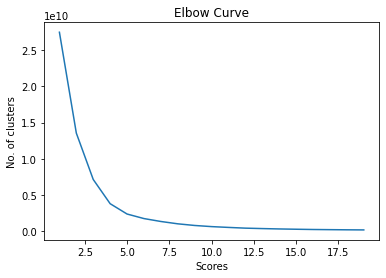

In [24]:
plt.plot(k, score)
plt.xlabel("Scores")
plt.ylabel("No. of clusters")
plt.title("Elbow Curve")


#### As the curve flatens near the value 7, we are going to calculate Silhouette Score for clusters 2 to 8

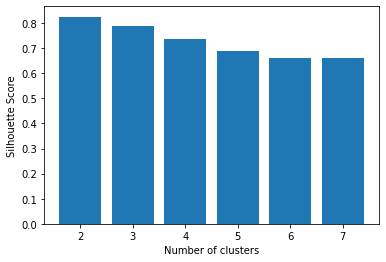

In [25]:
ss = []
k = range(2, 8)
for n in k:
    ss.append(silhouette_score(tabpca, KMeans(n_clusters=n).fit_predict(tabpca)))

plt.bar(k, ss)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()


#### The Silhouette Score for 2 clusters is the highest, hence we will take just 2 clusters

In [26]:
km = KMeans(n_clusters=2, random_state=23)
km.fit(tabpca)


KMeans(n_clusters=2, random_state=23)

#### Bring the data back to it's original form

In [27]:
for col in cols:
    tab[col] = np.exp(tab[col])


## Final Clusters

C:\Users\Ritwik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


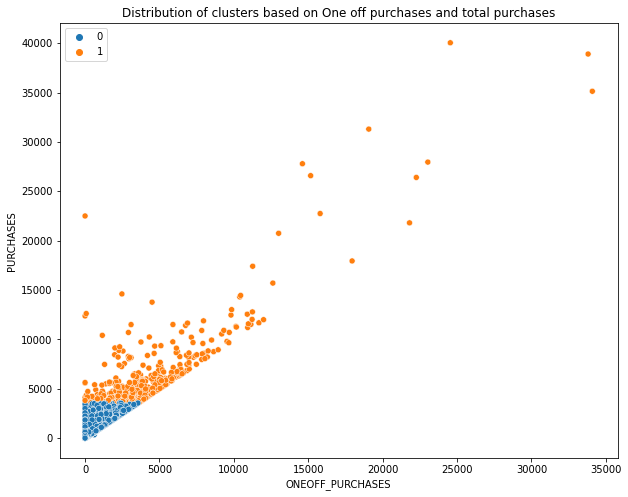

In [28]:
plt.figure(figsize=(10, 8))
sb.scatterplot(tab.ONEOFF_PURCHASES, tab.PURCHASES, hue=km.labels_)
plt.title("Distribution of clusters based on One off purchases and total purchases")
plt.show()


C:\Users\Ritwik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


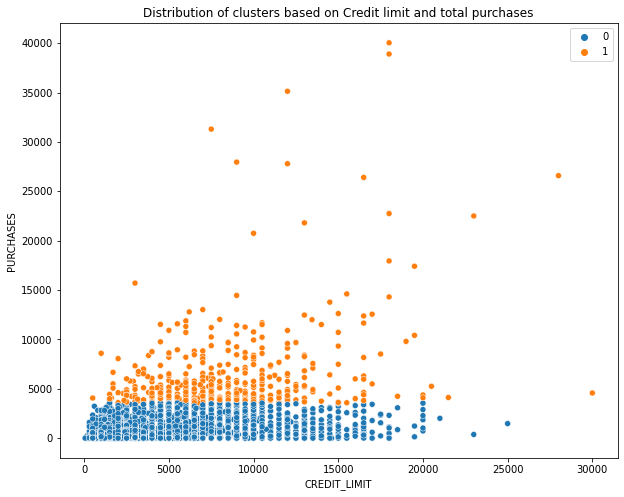

In [29]:
plt.figure(figsize=(10, 8))
sb.scatterplot(tab.CREDIT_LIMIT, tab.PURCHASES, hue=km.labels_)
plt.title("Distribution of clusters based on Credit limit and total purchases")
plt.show()


#### Looking at the above 2 plots, we can see that our model has clustered customers with low usage of credit card in one cluster and model with higher usage of clusters in other